In [1]:
import matplotlib.pyplot as plt
import numpy as np


import numpy as np
z = np.loadtxt('SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.CSV', delimiter=',')
print(z.shape)

(1800, 3600)


In [2]:
import matplotlib as mpl

In [3]:
# mpl.style.use('seaborn')

In [4]:
z[z==99999] = 0

In [5]:
tmp = z
tmp = np.log(tmp)
tmp[tmp==-np.inf] = 0
tmp

/home/elliott/anaconda3/envs/hgdlEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [7.92537079, 7.92537079, 7.92537079, ..., 7.92537079, 7.92537079,
        7.92537079],
       [7.92537079, 7.92537079, 7.92537079, ..., 7.92537079, 7.92537079,
        7.92537079],
       [7.91336007, 7.91336007, 7.91336007, ..., 7.91336007, 7.91336007,
        7.91336007]])

In [6]:
save = z
z = tmp

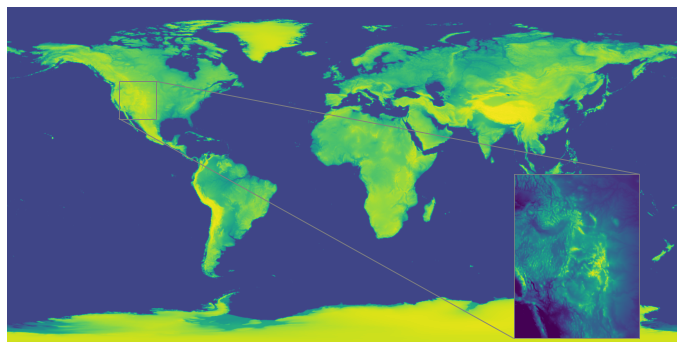

In [7]:
fig = plt.figure(figsize=(12,8))
plt.imshow(z, cmap='viridis')

ax = plt.gca()
ax.axis('off');

z_subset = ((400, 600), (600, 800))
z = save
inset_z = z[slice(*z_subset[0]), slice(*z_subset[1])]
axins = ax.inset_axes([0.605, 0.01, 0.49, 0.49])

axins.set_xlim(*z_subset[1])
axins.set_ylim(*z_subset[0])
axins.imshow(inset_z, extent=(*z_subset[1], *z_subset[0]), cmap='viridis')

for key in axins.spines.keys():
    axins.spines[key].set_color('grey')

axins.set_xticks([])
axins.set_yticks([])
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, alpha=0.95);

plt.savefig('earth_global', bbox_inches='tight', pad_inches=0)

In [9]:
np.save('west_coast', inset_z)

In [11]:
inset_z.shape

(200, 200)